# San Francisco Police Dept. Crime Prediction (CS 194 Project)
### Anand Kuchibotla, Harish Shanker, Kunal Roy, Alex Romano

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

In [47]:
df = pd.read_csv('data.csv')
df

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150837068,ARSON,ARSON,Wednesday,09/23/2015,23:36,BAYVIEW,NONE,3RD ST / ARMSTRONG AV,-122.393573,37.726980,"(37.7269797737306, -122.393573303211)",15083706826030
1,150839581,LARCENY/THEFT,THEFT OF COMPUTERS OR CELL PHONES,Wednesday,09/23/2015,23:30,NORTHERN,NONE,800 Block of VANNESS AV,-122.420815,37.783628,"(37.7836278720696, -122.42081470958)",15083958106126
2,150837143,OTHER OFFENSES,MISCELLANEOUS STATE MISDEMEANOR,Wednesday,09/23/2015,23:30,MISSION,"ARREST, BOOKED",3000 Block of MISSION ST,-122.418163,37.748589,"(37.7485889485524, -122.418163204335)",15083714327300
3,156237868,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,09/23/2015,23:30,CENTRAL,NONE,FRONT ST / UNION ST,-122.400439,37.801525,"(37.8015247279208, -122.40043884726)",15623786806244
4,150837030,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,09/23/2015,23:21,MISSION,"ARREST, CITED",CLINTONPARK ST / VALENCIA ST,-122.422311,37.769279,"(37.7692785775733, -122.422310623628)",15083703065016
5,150837080,ASSAULT,BATTERY,Wednesday,09/23/2015,23:20,BAYVIEW,"ARREST, BOOKED",100 Block of APOLLO ST,-122.398745,37.730854,"(37.7308540218074, -122.398744755386)",15083708004134
6,150837206,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Wednesday,09/23/2015,23:15,NORTHERN,NONE,0 Block of MARINA BL,-122.432952,37.805052,"(37.8050520228881, -122.432951589917)",15083720606304
7,150837165,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Wednesday,09/23/2015,23:06,CENTRAL,NONE,1300 Block of COLUMBUS AV,-122.418537,37.806152,"(37.8061515935611, -122.418537074676)",15083716564020
8,150837002,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Wednesday,09/23/2015,22:40,NORTHERN,"ARREST, BOOKED",800 Block of ELLIS ST,-122.420213,37.783979,"(37.7839789136387, -122.420212775999)",15083700219090
9,150837002,OTHER OFFENSES,RESISTING ARREST,Wednesday,09/23/2015,22:40,NORTHERN,"ARREST, BOOKED",800 Block of ELLIS ST,-122.420213,37.783979,"(37.7839789136387, -122.420212775999)",15083700227170


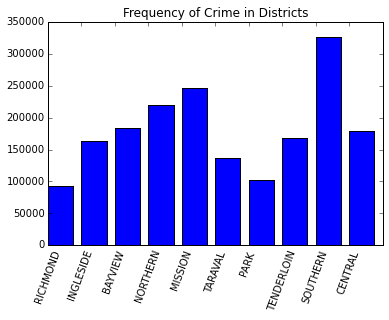

In [155]:
districts = dict(df['PdDistrict'].value_counts())
        
plt.title('Frequency of Crime in Districts')
bins = np.arange(len(districts))
plt.bar(bins, districts.values(), width=0.75)
plt.xticks(bins, list(districts.keys()), rotation=70, ha='center')
plt.show()

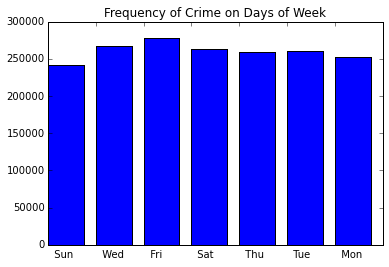

In [153]:
dow = dict(df['DayOfWeek'].value_counts())
        
plt.title('Frequency of Crime on Days of Week')
bins = np.arange(len(dow))
plt.bar(bins, dow.values(), width=0.75)
plt.xticks(bins, ['  ' + d[:3] for d in dow.keys()], ha='left')
plt.show()

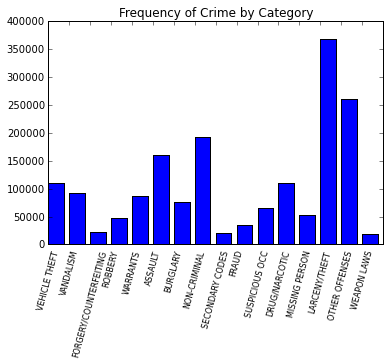

In [143]:
cats = dict(df['Category'].value_counts()[:16])

plt.title('Frequency of Crime by Category')
bins = np.arange(len(cats))
plt.bar(bins, cats.values(), width=0.75)
plt.xticks(bins, list(cats.keys()), rotation=75, size=8, ha='center')
plt.show()

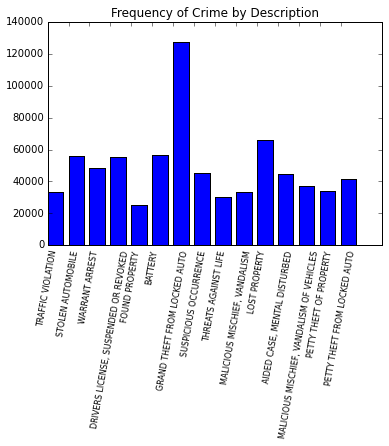

In [147]:
descs = dict(df['Descript'].value_counts()[:15])

plt.title('Frequency of Crime by Description')
bins = np.arange(len(descs))
plt.bar(bins, descs.values(), width=0.75)
plt.xticks(bins, list(descs.keys()), rotation=80, size=8, ha='center')
plt.show()

In [179]:
times_lists = {'6AM-10AM': [], '10AM-2PM': [], '2PM-6PM': [], '6PM-10PM': [], '10PM-2AM': [], '2AM-6AM': []}
cats_lists = {}

for c in set(df['Category']):
    cats_lists[c] = {'6AM-10AM': 0, '10AM-2PM': 0, '2PM-6PM': 0, '6PM-10PM': 0, '10PM-2AM': 0, '2AM-6AM': 0}

for i in range(len(df)):
    
    hour = int(df['Time'][i].split(':')[0])
    cat = df['Category'][i]
    
    if hour in range(6, 10):
        times_lists['6AM-10AM'].append(cat)
        cats_lists[cat]['6AM-10AM'] += 1 
    elif hour in range(10, 14):
        times_lists['10AM-2PM'].append(cat)
        cats_lists[cat]['10AM-2PM'] += 1 
    elif hour in range(14, 18):
        times_lists['2PM-6PM'].append(cat)
        cats_lists[cat]['2PM-6PM'] += 1 
    elif hour in range(18, 22):
        times_lists['6PM-10PM'].append(cat)
        cats_lists[cat]['6PM-10PM'] += 1 
    elif hour in range(22, 25) or ctime[0] in range(0, 2):
        times_lists['10PM-2AM'].append(cat)
        cats_lists[cat]['10PM-2AM'] += 1 
    elif hour in range(2, 6):
        times_lists['2AM-6AM'].append(cat)
        cats_lists[cat]['2AM-6AM'] += 1 

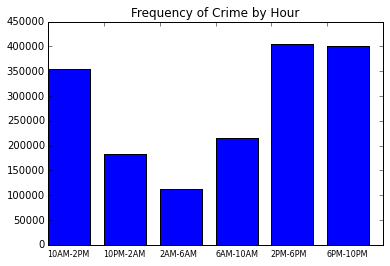

In [165]:
times = {}
for key in times_lists:
    times[key] = len(times_lists[key])

plt.title('Frequency of Crime by Hour')
bins = np.arange(len(times))
plt.bar(bins, times.values(), width=0.75)
plt.xticks(bins, list(times.keys()), size=8, ha='left')
plt.show()

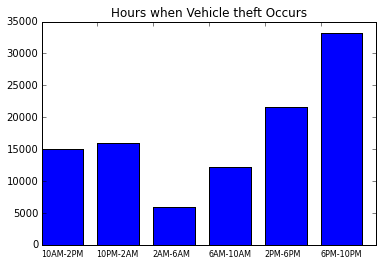

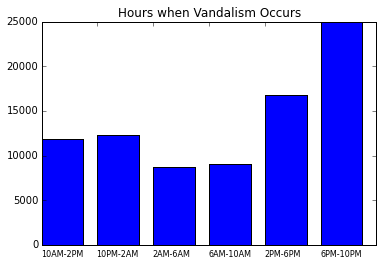

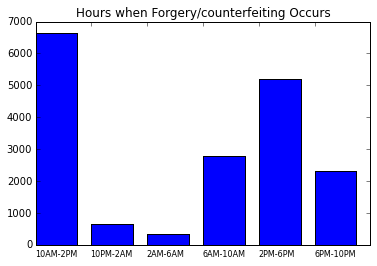

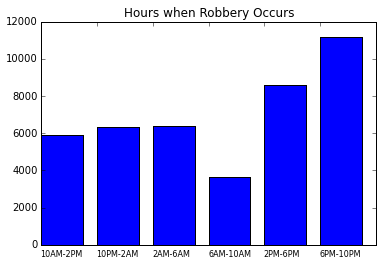

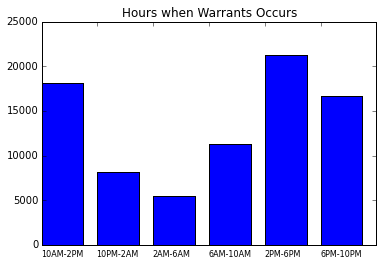

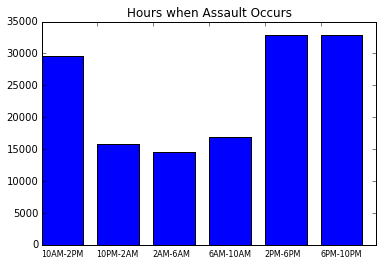

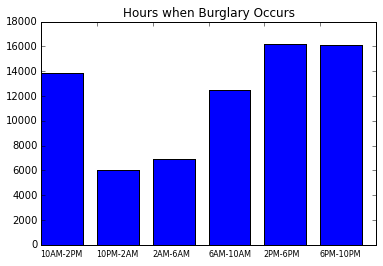

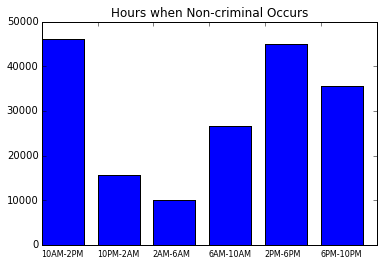

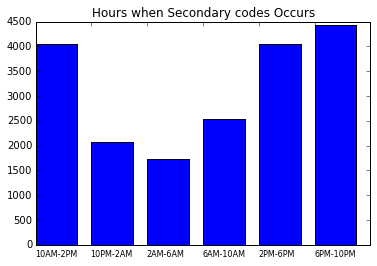

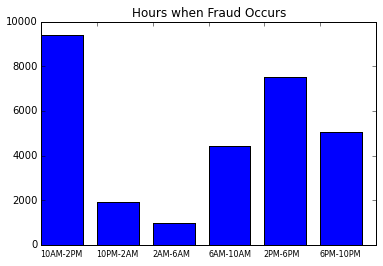

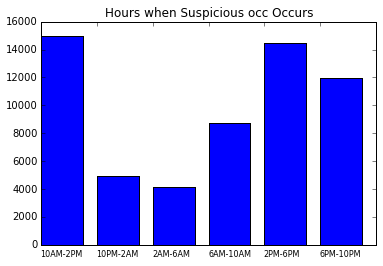

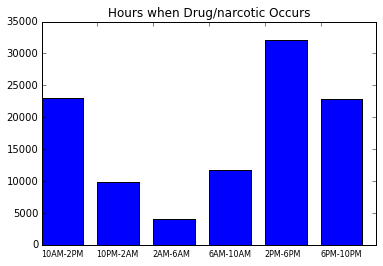

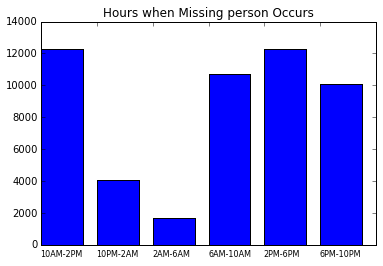

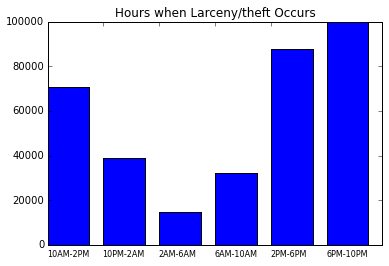

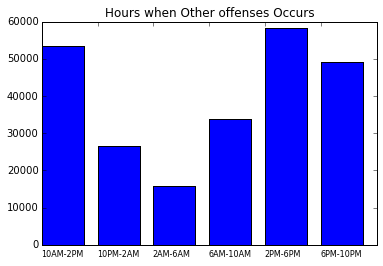

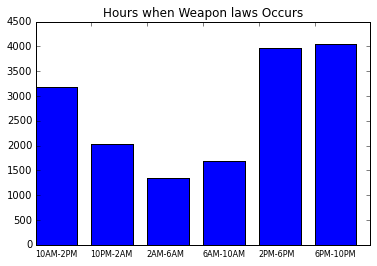

In [188]:
crimes = list(dict(df['Category'].value_counts()[:16]).keys())
for crime in crimes:
    c = cats_lists[crime]
    plt.title('Hours when ' + crime[0] + crime[1:].lower() + ' Occurs')
    bins = np.arange(len(c))
    plt.bar(bins, c.values(), width=0.75)
    plt.xticks(bins, list(c.keys()), size=8, ha='left')
    plt.show()